# Exercises 13-11-2023

In [6]:
from scipy.stats import norm
from scipy.stats import expon
import matplotlib.pyplot as plt
import random_number_generator as rng
import numpy as np
from mylib.radom_numbers import rand_uniform, rand_expon
from mylib.basics import sturges

## Exercise 7.1
Generate a sample of pseudo-random numbers distributed according to an exponential density distribution with a characteristic time t0 of 5 seconds.

Visualize the distribution of the obtained sample in a histogram using the inverse function method.

Write all functions responsible for random number generation in a library, implemented in separate files from the main program.

### random exponentially distributed numbers using rand_TAC

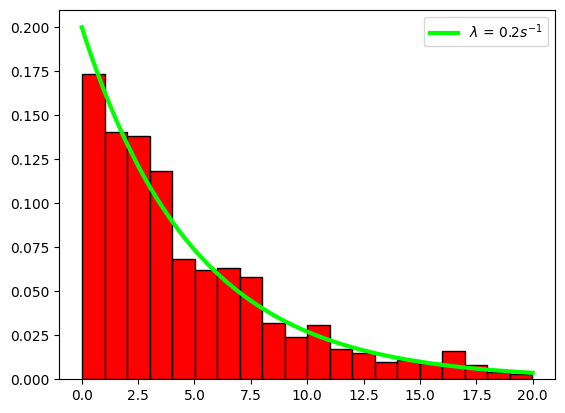

In [7]:
t0 = 5

fix_expon = rng.expon(t0)
X = np.linspace(0,20, 1000)
Y = fix_expon.pdf(X)
exponential_random_numbers = np.array([rng.rand_TAC(fix_expon.pdf,0,max(X),1) for _ in range(1000)])

plt.hist(exponential_random_numbers,bins=20,density=True,color='red',edgecolor='black')
plt.plot(X,Y,label=f'$\lambda$ = {1/t0}' + '$s^{-1}$',linewidth=3,color='lime')
plt.legend()
plt.show()

### random numbers in esponential distribution using inverse CDF

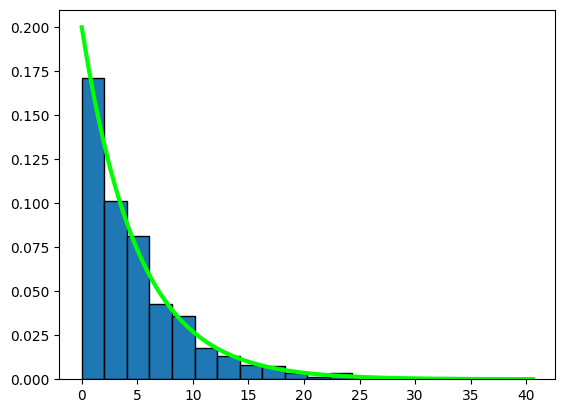

In [8]:
# Y = np.linspace(0.01,0.99,1000) # exponential_pdf(exponential_random_numbers)
Y = np.random.rand(1000)
exponential_random_numbers = -t0*np.log(1-Y) # inverse CDF

plt.hist(exponential_random_numbers,bins=20,density=True,edgecolor='black')

fix_expon = rng.expon(t0)
X = np.linspace(0,max(exponential_random_numbers), 1000)
Y = fix_expon.pdf(X)

plt.plot(X,Y,label=f'$\lambda$ = {1/t0}' + '$s^{-1}$',linewidth=3,color='lime')
plt.show()

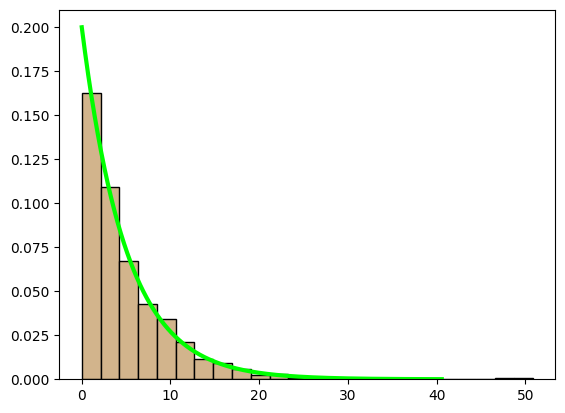

In [9]:
from mylib.radom_numbers import rand_uniform

def rand_expon(t0,size=1):
  return -t0*np.log(1-rand_uniform(0,1,size=size))

plt.hist(rand_expon(t0,size=1000),edgecolor='black',color='tan',bins=sturges(1000),density=True)
fix_expon = rng.expon(t0)
X = np.linspace(0,max(exponential_random_numbers), 1000)
Y = fix_expon.pdf(X)

plt.plot(X,Y,label=f'$\lambda$ = {1/t0}' + '$s^{-1}$',linewidth=3,color='lime')
plt.show()

## Exercise 7.2
Use the result from the first exercise to simulate a counting experiment with Poisson characteristics:

Choose a characteristic time t0 for a radioactive decay process;

Choose a measurement time tM for the counting window;

In a loop, simulate N pseudo-experiments of counting, where, for each of them, a sequence of random events is generated with an intertime characteristic of Poisson phenomena, until the total time elapsed is greater than the measurement time, counting the number of generated events that fall within the interval.

Fill a histogram with the simulated counts for each experiment.

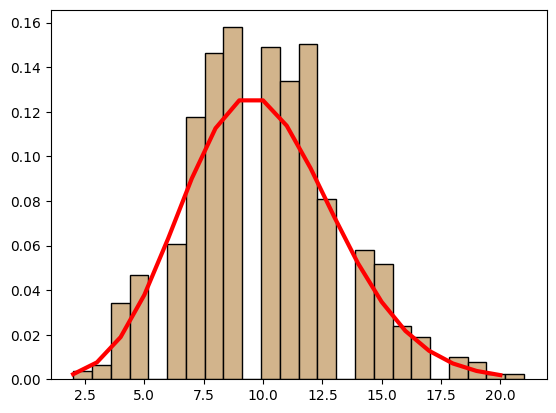

In [10]:
from scipy.stats import poisson
import scipy as sc
# from mylib.radom_numbers import rand_expon
t0 = 1
tM = 10

def experiment(tM):
    N = -1 # t = 0 is not a measurement
    while tM > 0:
        N += 1
        tM -= rand_expon(t0)
    return N

poissonX = np.array([experiment(tM) for _ in range(1000)])
poisson_fix = poisson(tM/t0)
X = np.arange(min(poissonX),max(poissonX))
plt.hist(poissonX,edgecolor='black',color='tan',density=True,bins=sturges(1000))
plt.plot(X,poisson_fix.pmf(X),color='red',linewidth=3)
plt.plot()
plt.show()


## Exercise 7.3
Use the source code written in the previous exercise to add to the library developed for exercise 1 a function that generates random numbers according to the Poisson distribution, with the mean expected events as an input parameter.

Rewrite the previous exercise using this function, also drawing the probability density histogram.

Calculate the sample statistics (mean, variance, skewness, kurtosis) from the input list using a library.

Use the generated sample to test the functionality of the library.

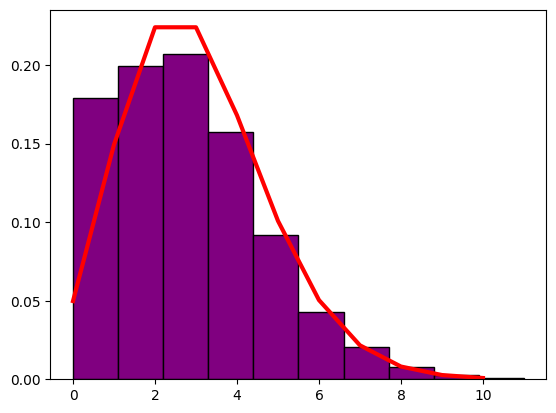

Stats:  {'mean': 3.0147, 'var': 2.9894839100000006, 'skew': 0.5708538371923314, 'kurt': 0.3265613062017252}
Expected:  {'mean': 3, 'var': 3, 'skew': 0.5773502691896258, 'kurt': 0.3333333333333333}


In [11]:
## POISSON DISTRIBUTION FUNCTION GENERATOR

def random_poisson(mu):
    tM = mu
    t0 = 1
    N = -1 # t = 0 is not a measurement
    while tM > 0:
        N += 1
        tM -= rand_expon(t0)
    return N

def rand_poisson(mu, size = 1): # nella lib
    def toy(mu):
        N = -1
        while mu>0:
            N += 1
            mu -= rand_expon(1)
        return N
    if size==1: return toy(mu)
    else: return np.array([toy(mu) for _ in range(size)])

def poisson_stats(X):
    return {'mean':np.mean(X),'var':np.var(X),'skew':sc.stats.skew(X),'kurt':sc.stats.kurtosis(X)}

def poisson_expected_stats(mu):
    return {'mean':mu,'var':mu,'skew':1/np.sqrt(mu),'kurt':1/mu}

## testing
mu = 3
# H = np.array([random_poisson(mu) for _ in np.arange(1000)])
H = rand_poisson(mu, 10000)
X = np.arange(min(H),max(H))
Y = poisson.pmf(X,mu)

plt.hist(H,edgecolor='black',color='purple',density=True)
plt.plot(X,Y,color='red',linewidth=3)
plt.plot()
plt.show()

print('Stats: ',poisson_stats(H))
print('Expected: ',poisson_expected_stats(mu))

## Exercise 7.4
Use the result from the previous exercise to calculate the statistics of a Poisson distribution varying the mean, from 1 to 250 (how should you sample the interval?).

Plot the obtained behavior of skewness and kurtosis as function of the Poisson mean

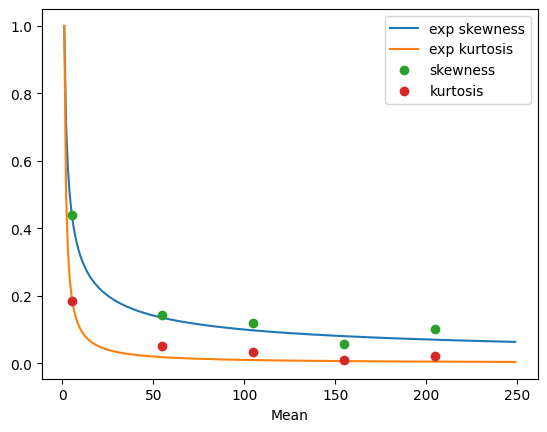

In [12]:
exp_skew = []
exp_kurt = []
skew = []
kurt = []

N = np.arange(1,250)
for i in N:
    s = poisson_expected_stats(i)
    exp_skew.append(s['skew'])
    exp_kurt.append(s['kurt'])

M = np.arange(5,250,50)
for m in M:
    toy = rand_poisson(m,10000)
    s = poisson_stats(toy)
    skew.append(s['skew'])
    kurt.append(s['kurt'])

plt.plot(N,exp_skew,label='exp skewness')
plt.plot(N,exp_kurt,label='exp kurtosis')
plt.plot(M,skew,'o',label='skewness')
plt.plot(M,kurt,'o',label='kurtosis')
plt.xlabel('Mean')
plt.legend()
plt.show()
